Name: Krishna GSVV  
Roll no. AV.EN.U4CSE22016  

In [154]:
path_data = '../../data/'

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 11. U.S. Supreme Court, 1965: Swain vs. Alabama

1.1.3.1. Generating One Value of the Statistic

In [156]:
def sample_proportions(sample_size, probabilities):
    """Return the proportion of random draws for each outcome in a distribution.
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
        ``probabilities``: An array of probabilities that forms a distribution.
    Returns:
        An array with the same length as ``probability`` that sums to 1.
    """
    return np.random.multinomial(sample_size, probabilities) / sample_size

In [157]:
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)

array([0.31, 0.69])

In [158]:
(100 * sample_proportions(100, eligible_population)).item(0)

27.0

1.1.4. Running the Simulation

In [159]:
def one_simulated_count():
    return (100 * sample_proportions(100, eligible_population)).item(0)

In [160]:
counts = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

1.1.5. The Prediction

In [161]:
def hist_with_bins(df, bins, plot_title, x_axis_label, y_axis_label):
    source = df
    fig, ax1 = plt.subplots()
    ax1.hist(source, bins=bins, density=True, alpha=0.8, ec="white")
    y_vals = ax1.get_yticks()
    y_label = y_axis_label
    x_label = x_axis_label
    ax1.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title("%s" % plot_title)
    plt.show()

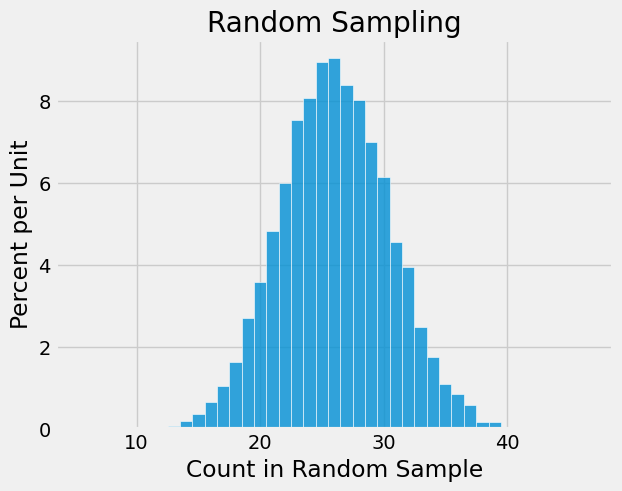

In [162]:
random_sample_counts = pd.DataFrame({"Count in a Random Sample": counts})
hist_with_bins(
    random_sample_counts,
    np.arange(5.5, 46.6, 1),
    "Random Sampling",
    "Count in Random Sample",
    "Percent per Unit",
)

1.1.6. Comparing the Prediction and the Data

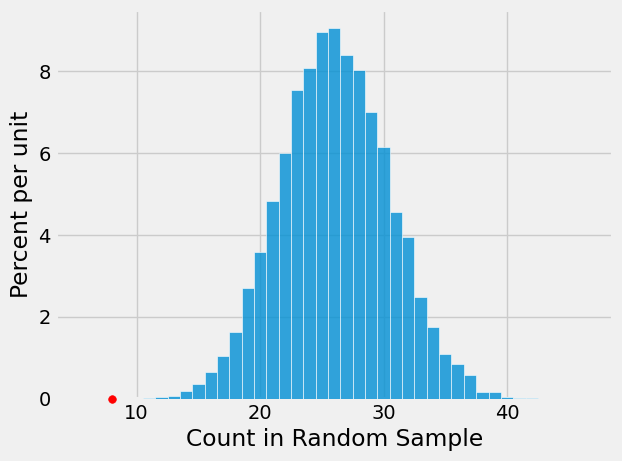

In [163]:
bins = np.arange(5.5, 46.6, 1)
unit = ""
fig, ax = plt.subplots()
ax.hist(random_sample_counts, bins=bins, density=True, alpha=0.8, ec="white", zorder=5)
ax.scatter(8, 0, color="red", s=30, zorder=10).set_clip_on(False)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Count in Random Sample"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
plt.show()

1.1.8 Mendel’s Pea Flowers

1.1.10.1. Generating One Value of the Statistic

In [164]:
def distance_from_75(p):
    return abs(100 * p - 75)

In [165]:
model_proportions = [0.75, 0.25]

In [166]:
proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
distance_from_75(proportion_purple_in_sample)

0.08073196986005371

1.1.11. Running the Simulation

In [167]:
def one_simulated_distance():
    proportion_purple_in_sample = sample_proportions(929, model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)

In [168]:
distances = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

1.1.12. The Prediction

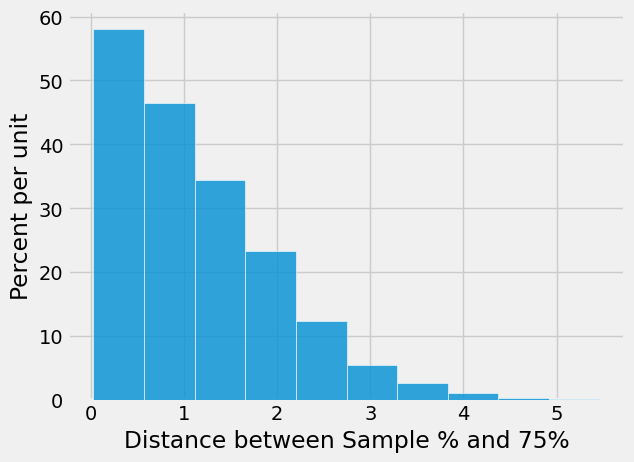

In [169]:
sample_distance = pd.DataFrame({"Distance between Sample % and 75%": distances})
unit = ""
fig, ax = plt.subplots()
ax.hist(sample_distance, density=True, alpha=0.8, ec="white", zorder=5)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Distance between Sample % and 75%"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
plt.show()

1.1.13. Comparing the Prediction and the Data

In [170]:
705 / 929

0.7588805166846071

In [171]:
observed_statistic = distance_from_75(705 / 929)
observed_statistic

0.8880516684607045

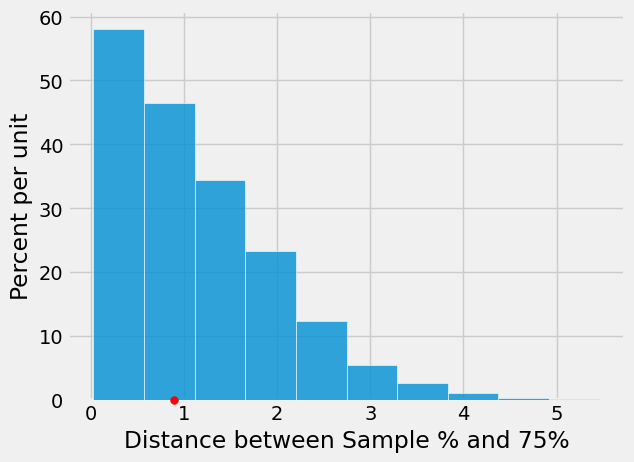

In [172]:
distance_0_75 = pd.DataFrame({"Distance between Sample % and 75%": distances})
unit = ""
fig, ax = plt.subplots()
ax.hist(distance_0_75, density=True, alpha=0.8, ec="white", zorder=5)
ax.scatter(observed_statistic, 0, color="red", s=30, zorder=10).set_clip_on(False)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Distance between Sample % and 75%"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
plt.show()

---------------------

2.1 Jury Selection in Alameda County

2.1.2. Composition of Panels in Alameda County

In [173]:
jury = pd.DataFrame(
    {
        "Ethnicity": np.array(["Asian", "Black", "Latino", "White", "Other"]),
        "Eligible": np.array([0.15, 0.18, 0.12, 0.54, 0.01]),
        "Panels": np.array([0.26, 0.08, 0.08, 0.54, 0.04]),
    }
)

jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


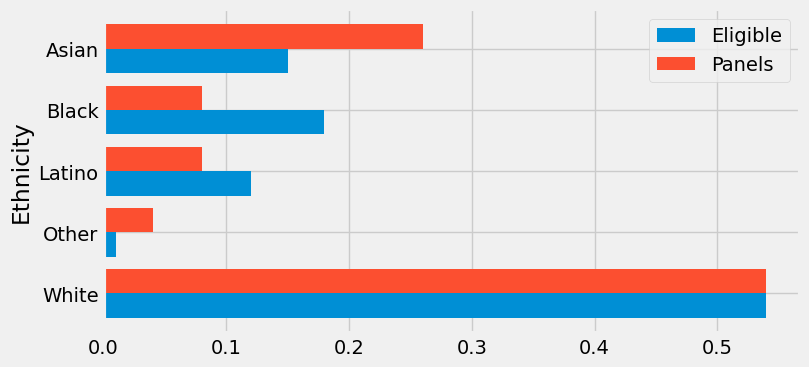

In [174]:
jury = jury.sort_values(by=["Ethnicity"], ascending=False)
jury.plot.barh("Ethnicity", width=0.8, figsize=(8, 4))
plt.show()

2.1.3. Comparison with Panels Selected at Random

In [175]:
def sample_proportions(sample_size, probabilities):
    """Return the proportion of random draws for each outcome in a distribution.
    This function is similar to np.random.multinomial, but returns proportions
    instead of counts.
    Args:
        ``sample_size``: The size of the sample to draw from the distribution.
        ``probabilities``: An array of probabilities that forms a distribution.
    Returns:
        An array with the same length as ``probability`` that sums to 1.
    """
    return np.random.multinomial(sample_size, probabilities) / sample_size

In [176]:
jury1 = jury.copy()

eligible_population = jury1["Eligible"]
sample_distribution = sample_proportions(1453, eligible_population)

panels_and_sample = jury1
panels_and_sample["Random Sample"] = sample_distribution
panels_and_sample = panels_and_sample.sort_values(["Ethnicity"], ascending=True)
display(panels_and_sample)

,Ethnicity,Eligible,Panels,Random Sample
0,Asian,0.15,0.26,0.144529
1,Black,0.18,0.08,0.187199
2,Latino,0.12,0.08,0.112870
4,Other,0.01,0.04,0.004129
3,White,0.54,0.54,0.551273


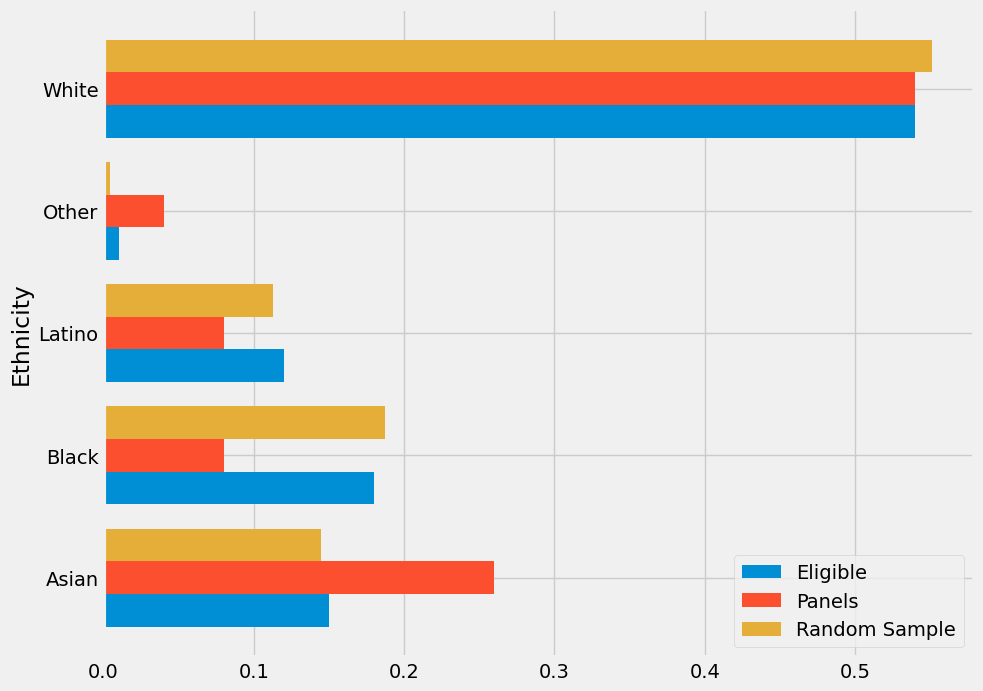

In [177]:
panels_and_sample.plot.barh("Ethnicity", width=0.8, figsize=(10, 8))
plt.show()

2.1.4. A New Statistic: The Distance between Two Distributions

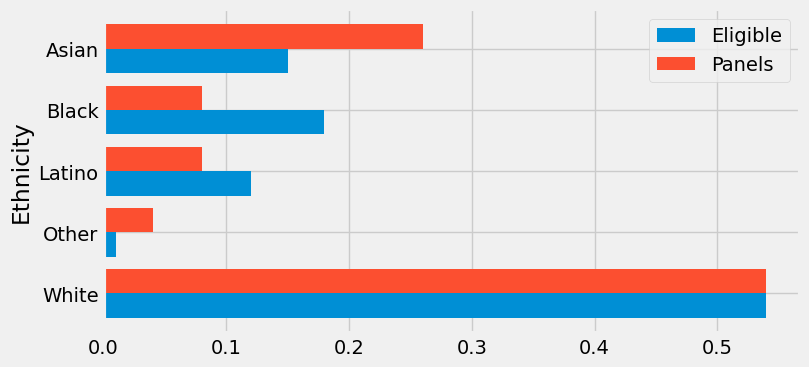

In [178]:
jury.plot.barh("Ethnicity", width=0.8, figsize=(8, 4))
plt.show()

In [179]:
jury_with_diffs = jury.sort_values(by=["Ethnicity"]).copy()
jury_with_diffs["Difference"] = jury["Panels"] - jury["Eligible"]
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
4,Other,0.01,0.04,0.03
3,White,0.54,0.54,0.00


In [180]:
jury_with_diffs["Absolute Difference"] = np.abs(jury_with_diffs["Difference"])
jury_with_diffs

,Ethnicity,Eligible,Panels,Difference,Absolute Difference
0,Asian,0.15,0.26,0.11,0.11
1,Black,0.18,0.08,-0.10,0.10
2,Latino,0.12,0.08,-0.04,0.04
4,Other,0.01,0.04,0.03,0.03
3,White,0.54,0.54,0.00,0.00


In [181]:
jury_with_diffs["Absolute Difference"].sum() / 2

np.float64(0.14)

2.1.5. Simulating One Value of the Statistic

In [182]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [183]:
total_variation_distance(jury["Panels"], jury["Eligible"])

0.14

In [184]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.023509979353062645

2.1.6. Predicting the Statistic Under the Model of Random Selection

In [185]:
def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)

In [186]:
tvds = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

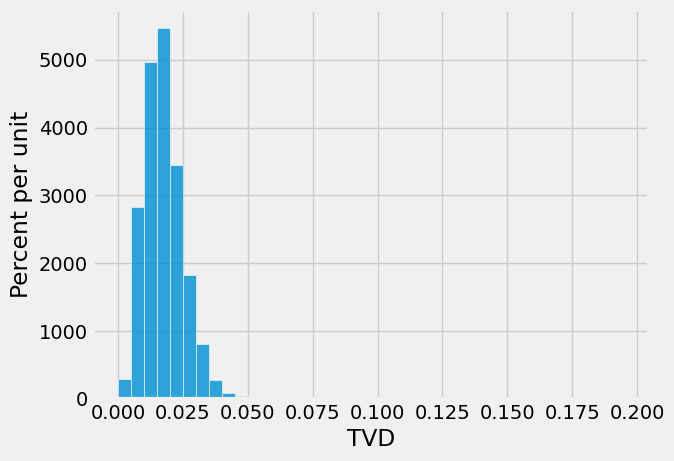

In [187]:
TVD = pd.DataFrame({"TVD": tvds})
unit = ""
fig, ax1 = plt.subplots()
ax1.hist(TVD, bins=np.arange(0, 0.2, 0.005), density=True, alpha=0.8, ec="white")
y_vals = ax1.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "TVD"
ax1.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.show()

-----------------

3.4.2. The GSI’s Defense

In [188]:
scores = pd.read_csv(r".\Datasets\scores_by_section.csv")
scores

,Unnamed: 0,Section,Midterm
0,0,1,22
1,1,2,12
2,2,2,23
3,3,2,14
4,4,1,20
...,...,...,...
354,354,5,24
355,355,2,16
356,356,2,17
357,357,12,16


In [189]:
section_averages = scores.groupby(["Section"]).mean()
section_averages

,Unnamed: 0,Midterm
Section,,
1,145.593750,15.593750
2,176.750000,15.125000
3,212.148148,13.666667
4,173.533333,14.766667
5,181.575758,17.454545
6,192.281250,15.031250
7,158.458333,16.625000
8,166.310345,16.310345
9,179.233333,14.566667


In [190]:
scores.groupby("Section").count()

,Unnamed: 0,Midterm
Section,,
1,32,32
2,32,32
3,27,27
4,30,30
5,33,33
6,32,32
7,24,24
8,29,29
9,30,30


In [191]:
scores_only = scores.drop(columns=["Section"])

In [192]:
random_sample = scores_only.sample(27, replace=False)
random_sample

,Unnamed: 0,Midterm
257,257,14
176,176,8
282,282,15
92,92,17
158,158,7
192,192,23
19,19,14
159,159,24
229,229,19
294,294,17


In [193]:
np.average(random_sample["Midterm"])

np.float64(17.037037037037038)

In [194]:
def random_sample_average():
    random_sample = scores_only.sample(27, replace=False)
    return np.average(random_sample["Midterm"])

In [195]:
sample_averages = np.array([])

repetitions = 10000
for i in np.arange(repetitions):
    sample_averages = np.append(sample_averages, random_sample_average())

sample_averages

array([14.18518519, 14.2962963 , 16.14814815, ..., 16.44444444,
       14.96296296, 16.33333333])

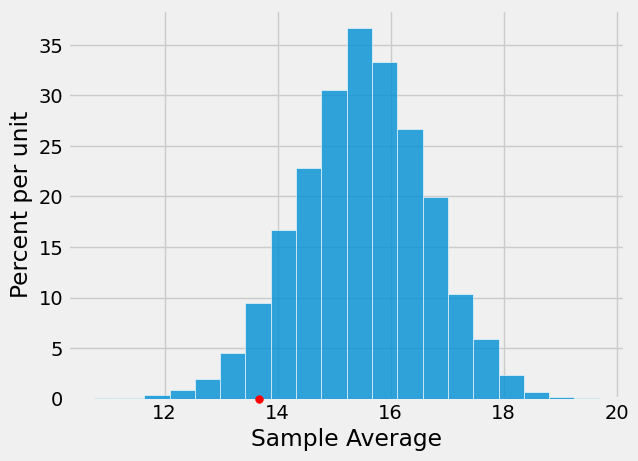

In [196]:
averages_tbl = pd.DataFrame({"Sample Average": sample_averages})
observed_statistic = 13.667
unit = ""
fig, ax = plt.subplots()
ax.hist(averages_tbl, bins=20, density=True, alpha=0.8, ec="white", zorder=5)
ax.scatter(observed_statistic, 0, color="red", s=30, zorder=10).set_clip_on(False)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Sample Average"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
plt.show()

In [197]:
np.count_nonzero(sample_averages <= observed_statistic) / repetitions

0.0551

-------------

4.1.1. The Chance of an Error

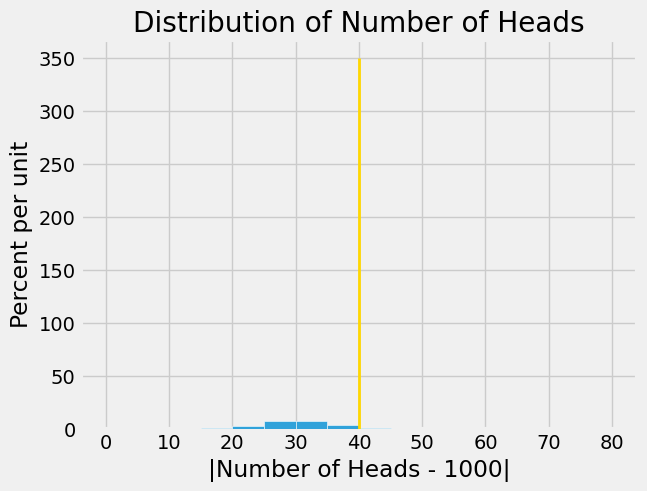

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
statistics = np.random.binomial(100, 0.3, 1000)

results = pd.DataFrame({"|Number of Heads - 1000|": statistics})
unit = ""

fig, ax = plt.subplots()
ax.hist(
    results["|Number of Heads - 1000|"],
    bins=np.arange(0, 81, 5),
    density=True,
    alpha=0.8,
    ec="white",
    zorder=5,
)
ax.plot([40, 40], [0, 3.5], color="gold", lw=2, zorder=10)

y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "|Number of Heads - 1000|"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("Distribution of Number of Heads")
plt.show()

# 12. Smokers and Nonsmokers

In [199]:
births = pd.read_csv(r".\Datasets\baby.csv")
births.head(10)

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
5,5,138,244,33,62,178,False
6,6,132,245,23,65,140,False
7,7,120,289,25,62,125,False
8,8,143,299,30,66,136,True
9,9,140,351,27,68,120,False


In [200]:
smoking_and_birthweight = births[["Maternal Smoker", "Birth Weight"]]

In [201]:
smoking_birthweight1 = smoking_and_birthweight.groupby(["Maternal Smoker"]).agg(
    count=pd.NamedAgg(column="Maternal Smoker", aggfunc="count")
)

smoking_birthweight1.reset_index()

,Maternal Smoker,count
0,False,715
1,True,459


In [202]:
smoker = births[births["Maternal Smoker"] == False]

non_smoker = births[births["Maternal Smoker"] == True]

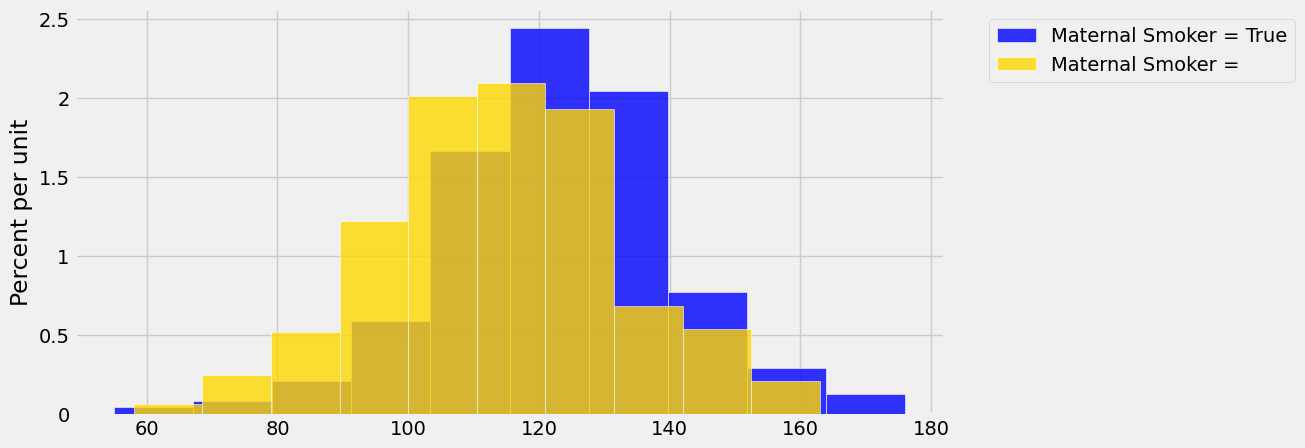

In [203]:
unit = ""
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    smoker["Birth Weight"],
    density=True,
    label="Maternal Smoker = True",
    color="blue",
    alpha=0.8,
    ec="white",
    zorder=5,
)
ax.hist(
    non_smoker["Birth Weight"],
    density=True,
    label="Maternal Smoker = ",
    color="gold",
    alpha=0.8,
    ec="white",
    zorder=10,
)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = ""
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

1.2. The Hypotheses
1.2.1. Test Statistic

In [204]:
means_table = smoking_and_birthweight.groupby("Maternal Smoker").mean()
means_table = means_table.reset_index()
means_table

,Maternal Smoker,Birth Weight
0,False,123.085315
1,True,113.819172


In [205]:
means = means_table["Birth Weight"]
observed_difference = means[1] - means[0]
observed_difference

np.float64(-9.266142572024918)

In [206]:
def difference_of_means(table, label, group_label):
    reduced = table[[label, group_label]]
    means_table = reduced.groupby(group_label).mean()
    means = means_table[label]
    return means[1] - means[0]

In [207]:
difference_of_means(births, "Birth Weight", "Maternal Smoker")

np.float64(-9.266142572024918)

1.2.2. Predicting the Statistic Under the Null Hypothesis

In [208]:
smoking_and_birthweight.head(10)

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
5,False,138
6,False,132
7,False,120
8,True,143
9,False,140


In [209]:
smoking_and_birthweight2 = smoking_and_birthweight.copy()
shuffled_labels = smoking_and_birthweight2.sample(
    len(smoking_and_birthweight2), replace=False
)
shuffled_labels = np.array(shuffled_labels["Maternal Smoker"])
smoking_and_birthweight2["Shuffled Label"] = shuffled_labels
original_and_shuffled = smoking_and_birthweight2

In [210]:
original_and_shuffled.head(10)

,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,True
1,False,113,True
2,True,128,False
3,True,108,True
4,False,136,True
5,False,138,True
6,False,132,False
7,False,120,False
8,True,143,True
9,False,140,True


In [211]:
shuffled_only = original_and_shuffled.drop(columns=["Maternal Smoker"])
shuffled_group_means = shuffled_only.groupby("Shuffled Label").mean()
shuffled = shuffled_group_means.reset_index()
shuffled.head(10)

,Shuffled Label,Birth Weight
0,False,118.970629
1,True,120.228758


In [212]:
difference_of_means(original_and_shuffled, "Birth Weight", "Shuffled Label")

np.float64(1.2581287993052683)

In [213]:
difference_of_means(original_and_shuffled, "Birth Weight", "Maternal Smoker")

np.float64(-9.266142572024918)

In [214]:
def one_simulated_difference(table, label, group_label):
    births1 = table.copy()
    shuffled_labels = births1.sample(len(births1), replace=False)
    shuffled_labels = np.array(shuffled_labels[group_label])
    births1["Shuffled Label"] = shuffled_labels
    original_and_shuffled = births1
    shuffled_only = original_and_shuffled.drop(columns=["Maternal Smoker"])
    shuffled_group_means = shuffled_only.groupby("Shuffled Label").mean()
    table1 = shuffled_group_means.reset_index()
    return difference_of_means(table1, label, "Shuffled Label")

In [215]:
one_simulated_difference(births, "Birth Weight", "Maternal Smoker")

np.float64(-0.6521230403583331)

1.2.3. Permutation Test

In [216]:
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, "Birth Weight", "Maternal Smoker")
    differences = np.append(differences, new_difference)
differences

array([-1.55359020e+00, -1.75749349e+00, -3.05129729e-01, ...,
        4.17474900e-01,  1.70886238e+00, -1.06342459e-03])

1.2.4. Conclusion of the Test¶

Observed Difference: -9.266142572024918


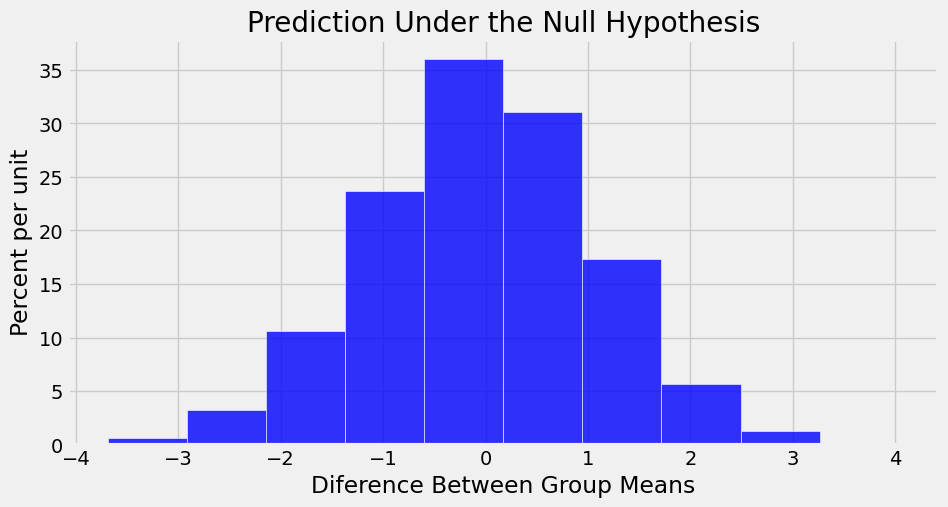

In [217]:
test_conclusion = pd.DataFrame({"Difference Between Group Means": differences})
print("Observed Difference:", observed_difference)
unit = ""
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(test_conclusion, density=True, color="blue", alpha=0.8, ec="white")
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Diference Between Group Means"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("Prediction Under the Null Hypothesis")
plt.show()

In [218]:
empirical_P = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_P

0.0

1.2.5. Another Permutation Test

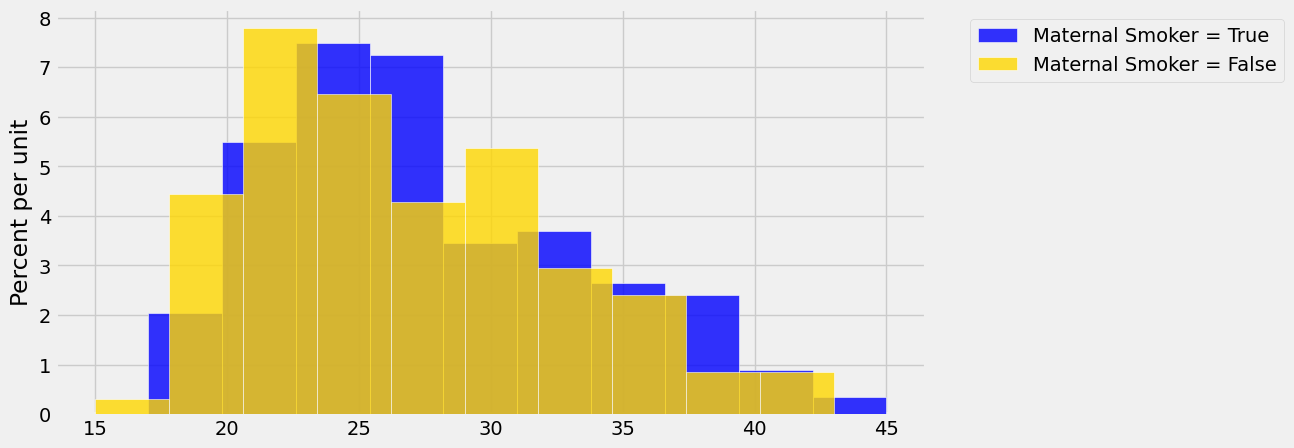

In [219]:
smoking_and_age = births[["Maternal Smoker", "Maternal Age"]]
unit = ""
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    smoker["Maternal Age"],
    density=True,
    label="Maternal Smoker = True",
    color="blue",
    alpha=0.8,
    ec="white",
    zorder=5,
)
ax.hist(
    non_smoker["Maternal Age"],
    density=True,
    label="Maternal Smoker = False",
    color="gold",
    alpha=0.8,
    ec="white",
    zorder=10,
)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = ""
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [220]:
observed_age_difference = difference_of_means(births, "Maternal Age", "Maternal Smoker")
observed_age_difference

np.float64(-0.8076725017901509)

In [221]:
age_differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(births, "Maternal Age", "Maternal Smoker")
    age_differences = np.append(age_differences, new_difference)

Observed Difference: -0.8076725017901509


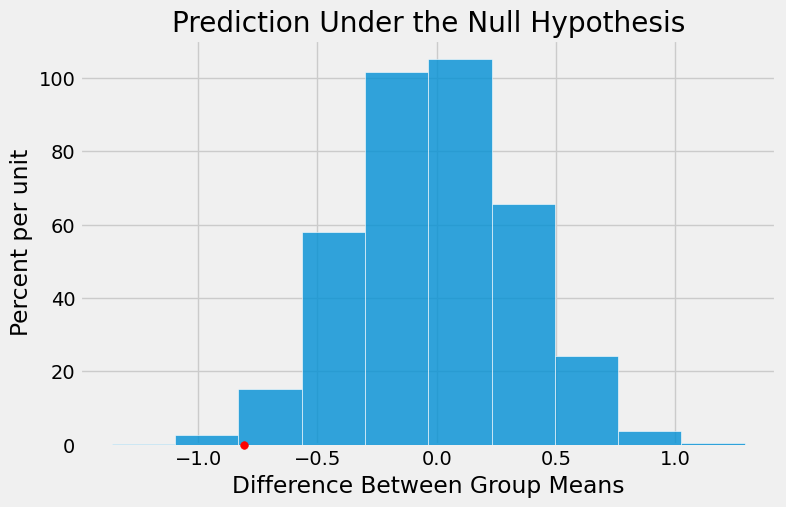

In [222]:
mean_differences = pd.DataFrame({"Difference Between Group Means": age_differences})
unit = ""
print("Observed Difference:", observed_age_difference)
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(mean_differences, density=True, alpha=0.8, ec="white", zorder=5)
ax.scatter(observed_age_difference, 0, color="red", s=30, zorder=10).set_clip_on(False)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Difference Between Group Means"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("Prediction Under the Null Hypothesis")
plt.show()

In [223]:
empirical_P = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_P

0.0092

--------------------

2. Deflategate

In [224]:
football = pd.read_csv(r".\Datasets\deflategate.csv")
football

,Unnamed: 0,Team,Blakeman,Prioleau
0,0,Patriots,11.50,11.80
1,1,Patriots,10.85,11.20
2,2,Patriots,11.15,11.50
3,3,Patriots,10.70,11.00
4,4,Patriots,11.10,11.45
5,5,Patriots,11.60,11.95
6,6,Patriots,11.85,12.30
7,7,Patriots,11.10,11.55
8,8,Patriots,10.95,11.35
9,9,Patriots,10.50,10.90


In [225]:
football_1 = football.copy()
football_1["Combined"] = (football_1["Blakeman"] + football_1["Prioleau"]) / 2
football_combined = football_1.drop(columns=["Blakeman", "Prioleau"])
football_combined

,Unnamed: 0,Team,Combined
0,0,Patriots,11.650
1,1,Patriots,11.025
2,2,Patriots,11.325
3,3,Patriots,10.850
4,4,Patriots,11.275
5,5,Patriots,11.775
6,6,Patriots,12.075
7,7,Patriots,11.325
8,8,Patriots,11.150
9,9,Patriots,10.700


In [226]:
np.ones(11)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [227]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [228]:
drop = start - football_combined["Combined"]
football_combined["Pressure Drop"] = drop
football_combined

,Unnamed: 0,Team,Combined,Pressure Drop
0,0,Patriots,11.650,0.850
1,1,Patriots,11.025,1.475
2,2,Patriots,11.325,1.175
3,3,Patriots,10.850,1.650
4,4,Patriots,11.275,1.225
5,5,Patriots,11.775,0.725
6,6,Patriots,12.075,0.425
7,7,Patriots,11.325,1.175
8,8,Patriots,11.150,1.350
9,9,Patriots,10.700,1.800


In [229]:
football_combined1 = football_combined.copy()

football_combined_average = football_combined1.drop(columns=["Combined"])

football_combined_average = football_combined_average.groupby(by=["Team"]).mean()

football_combined_average = football_combined_average.reset_index()

football_combined_average = football_combined_average.rename(
    columns={"Pressure Drop": "Pressure Drop average"}
)

football_combined_average

,Team,Unnamed: 0,Pressure Drop average
0,Colts,12.5,0.468750
1,Patriots,5.0,1.202273


2.2. Test Statistic

In [230]:
observed_means = football_combined_average["Pressure Drop average"]
observed_difference = observed_means.iloc[1] - observed_means.iloc[0]
observed_difference

np.float64(0.733522727272728)

In [231]:
def difference_of_means(table, label, group_label):
    reduced = table[[label, group_label]]
    means_table = reduced.groupby(group_label).mean()
    means = means_table[label]
    return means[1] - means[0]

In [232]:
difference_of_means(football_combined, "Pressure Drop", "Team")

np.float64(0.733522727272728)

2.3. Predicting the Statistic Under the Null Hypothesis

In [233]:
shuffled_labels3 = football_combined.copy()
shuffled_labels4 = shuffled_labels3
shuffled_labels5 = shuffled_labels4.sample(len(shuffled_labels3), replace=False)
shuffled_labels6 = np.array(shuffled_labels5["Team"])
shuffled_labels3["Shuffled Label"] = shuffled_labels6
original_and_shuffled = shuffled_labels3.drop(columns=["Combined"])
original_and_shuffled

,Unnamed: 0,Team,Pressure Drop,Shuffled Label
0,0,Patriots,0.850,Patriots
1,1,Patriots,1.475,Patriots
2,2,Patriots,1.175,Patriots
3,3,Patriots,1.650,Patriots
4,4,Patriots,1.225,Colts
5,5,Patriots,0.725,Colts
6,6,Patriots,0.425,Colts
7,7,Patriots,1.175,Patriots
8,8,Patriots,1.350,Patriots
9,9,Patriots,1.800,Patriots


In [234]:
difference_of_means(original_and_shuffled, "Pressure Drop", "Shuffled Label")

np.float64(0.4693181818181813)

In [235]:
difference_of_means(original_and_shuffled, "Pressure Drop", "Team")

np.float64(0.733522727272728)

2.3.1. Permutation Test

In [236]:
def one_simulated_difference(table, label, group_label):
    table_copy = table.copy()
    shuffled_labels = table_copy.sample(len(table_copy), replace=False)
    shuffled_labels = np.array(shuffled_labels[group_label])
    table_copy["Shuffled Label"] = shuffled_labels
    original_and_shuffled = table_copy.drop(columns=["Combined"])
    shuffled_group_means = original_and_shuffled.groupby("Shuffled Label").mean()
    table1 = shuffled_group_means.reset_index()
    return difference_of_means(table1, label, "Shuffled Label")

In [237]:
non_numeric = football_combined[
    pd.to_numeric(football_combined["Pressure Drop"], errors="coerce").isna()
]
print("\nRows with non-numeric values in 'Pressure Drop':")
print(non_numeric[["Team", "Pressure Drop"]])

football_combined["Pressure Drop"] = pd.to_numeric(
    football_combined["Pressure Drop"], errors="coerce"
)

football_combined["Pressure Drop"].fillna(
    football_combined["Pressure Drop"].mean(), inplace=True
)

print("\nData types after cleaning:")
print(football_combined.dtypes)

football_combined_average = football_combined.groupby(by=["Team"]).mean().reset_index()

football_combined_average = football_combined_average.rename(
    columns={"Pressure Drop": "Pressure Drop average"}
)

print("\nFootball Combined Average DataFrame:")
print(football_combined_average)

repetitions = 10000
differences = np.empty(repetitions)


Rows with non-numeric values in 'Pressure Drop':
Empty DataFrame
Columns: [Team, Pressure Drop]
Index: []

Data types after cleaning:
Unnamed: 0         int64
Team              object
Combined         float64
Pressure Drop    float64
dtype: object

Football Combined Average DataFrame:
       Team  Unnamed: 0   Combined  Pressure Drop average
0     Colts        12.5  12.531250               0.468750
1  Patriots         5.0  11.297727               1.202273


2.3.2. Conclusion of the Test¶

In [238]:
empirical_P = np.count_nonzero(differences >= observed_difference) / 10000
empirical_P

0.7934

Differences array: [1.05562696e-311 1.05562662e-311 1.29516345e-318 ... 3.10111767e+261
 1.47973335e+069 8.10843473e+276]
Minimum value in differences: nan
Maximum value in differences: nan
Test Conclusion DataFrame head:
    Difference Between Group Averages
0                      1.055627e-311
1                      1.055627e-311
2                      1.295163e-318
3                                NaN
4                      3.059050e+213
Empirical P-value: 0.7934


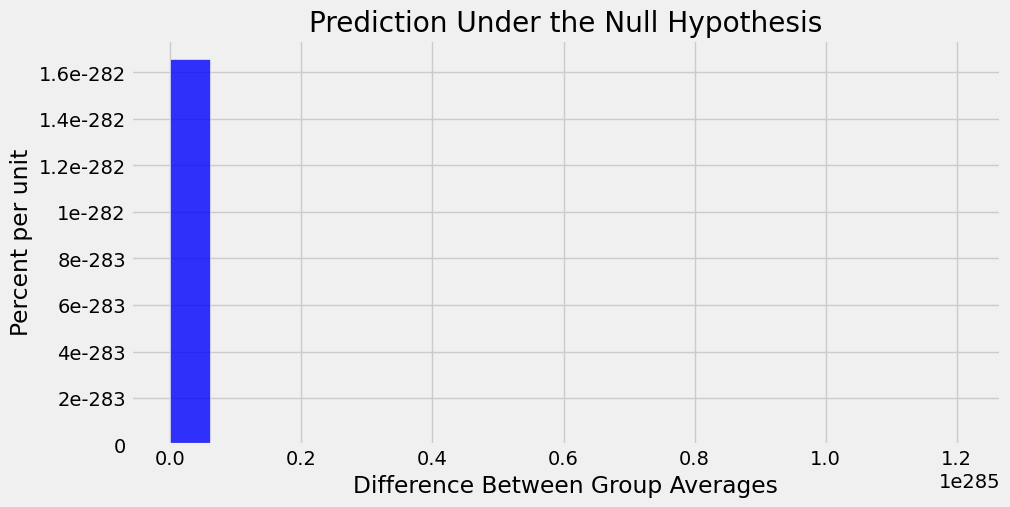

In [239]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Check if differences array contains values
print("Differences array:", differences)
print(
    "Minimum value in differences:",
    np.min(differences) if len(differences) > 0 else "Array is empty",
)
print(
    "Maximum value in differences:",
    np.max(differences) if len(differences) > 0 else "Array is empty",
)

# If the array has values, continue with the plotting
if len(differences) > 0:
    # Create DataFrame and check its contents
    test_conclusion = pd.DataFrame({"Difference Between Group Averages": differences})
    print("Test Conclusion DataFrame head:\n", test_conclusion.head())

    print("Empirical P-value:", empirical_P)

    # Plotting
    unit = ""
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot histogram directly from differences array to check if values appear
    ax.hist(differences, bins=20, density=True, color="blue", alpha=0.8, ec="white")

    # Configure y-axis labels
    y_vals = ax.get_yticks()
    y_label = "Percent per " + (unit if unit else "unit")
    x_label = "Difference Between Group Averages"
    ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])

    # Labels and title
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title("Prediction Under the Null Hypothesis")

    # Show plot
    plt.show()
else:
    print("No values in 'differences' array to plot.")

# 3. Causality

3.1. Treating Chronic Back Pain: A Randomized Controlled Trial

In [241]:
bta = pd.read_csv(r".\Datasets\bta.csv")
bta.tail(10)

,Unnamed: 0,Group,Result
21,21,Treatment,1.0
22,22,Treatment,1.0
23,23,Treatment,1.0
24,24,Treatment,1.0
25,25,Treatment,0.0
26,26,Treatment,0.0
27,27,Treatment,0.0
28,28,Treatment,0.0
29,29,Treatment,0.0
30,30,Treatment,0.0


In [242]:
bta_group = bta.groupby("Group").mean()

bta_group.reset_index()

,Group,Unnamed: 0,Result
0,Control,7.5,0.125
1,Treatment,23.0,0.600


3.2. Potential Outcomes

In [244]:
observed_outcomes = pd.read_csv(r".\Datasets\observed_outcomes.csv")
observed_outcomes.head(10)

,Group,Outcome if assigned treatment,Outcome if assigned control
0,Control,Unknown,1
1,Control,Unknown,1
2,Control,Unknown,0
3,Control,Unknown,0
4,Control,Unknown,0
5,Control,Unknown,0
6,Control,Unknown,0
7,Control,Unknown,0
8,Control,Unknown,0
9,Control,Unknown,0


3.2.2. The Test Statistic

In [245]:
bta_group = bta.groupby("Group").mean()
bta_group = bta_group.reset_index()
bta_group

,Group,Unnamed: 0,Result
0,Control,7.5,0.125
1,Treatment,23.0,0.600


In [246]:
observed_proportions = bta_group["Result"]
observed_distance = abs(observed_proportions.iloc[0] - observed_proportions.iloc[1])
observed_distance

np.float64(0.475)

In [247]:
def distance(table, label, group_label):
    reduced = table[[label, group_label]]
    proportions = reduced.groupby(group_label).mean()
    distance = proportions[label]
    return abs(distance.iloc[1] - distance.iloc[0])

In [ ]:
distance(bta_group, "Result", "Group")

3.2.4. Generating One Value of the Statistic

In [248]:
shuffled_labels3 = bta.copy()
shuffled_labels4 = shuffled_labels3
shuffled_labels5 = shuffled_labels4.sample(len(shuffled_labels3), replace=False)
shuffled_labels6 = np.array(shuffled_labels5["Group"])
shuffled_labels3["Shuffled Label"] = shuffled_labels6
bta_with_shuffled_labels = shuffled_labels3
bta_with_shuffled_labels.head(10)

,Unnamed: 0,Group,Result,Shuffled Label
0,0,Control,1.0,Treatment
1,1,Control,1.0,Control
2,2,Control,0.0,Control
3,3,Control,0.0,Treatment
4,4,Control,0.0,Control
5,5,Control,0.0,Treatment
6,6,Control,0.0,Treatment
7,7,Control,0.0,Control
8,8,Control,0.0,Treatment
9,9,Control,0.0,Treatment


In [249]:
distance(bta_with_shuffled_labels, "Result", "Shuffled Label")

np.float64(0.041666666666666685)

In [250]:
distance(bta_with_shuffled_labels, "Result", "Group")

np.float64(0.475)

3.2.5. Permutation Test¶

In [251]:
def one_simulated_distance(table, label, group_label):
    table_copy = table.copy()

    shuffled_labels = table_copy[group_label].sample(frac=1).reset_index(drop=True)
    table_copy["Shuffled Label"] = shuffled_labels

    table_copy[label] = pd.to_numeric(table_copy[label], errors="coerce")

    table_copy = table_copy.dropna(subset=[label])
    shuffled_group_means = table_copy.groupby("Shuffled Label")[label].mean()
    table1 = shuffled_group_means.reset_index()

    return distance(table1, label, "Shuffled Label")


distances = np.array([])
repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance(bta, "Result", "Group")
    distances = np.append(distances, new_distance)

3.2.6. Conclusion of the Test

In [252]:
empirical_P = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_P

0.0092

Observed Distance 0.475
Empirical P-value: 0.9199999999999999 %


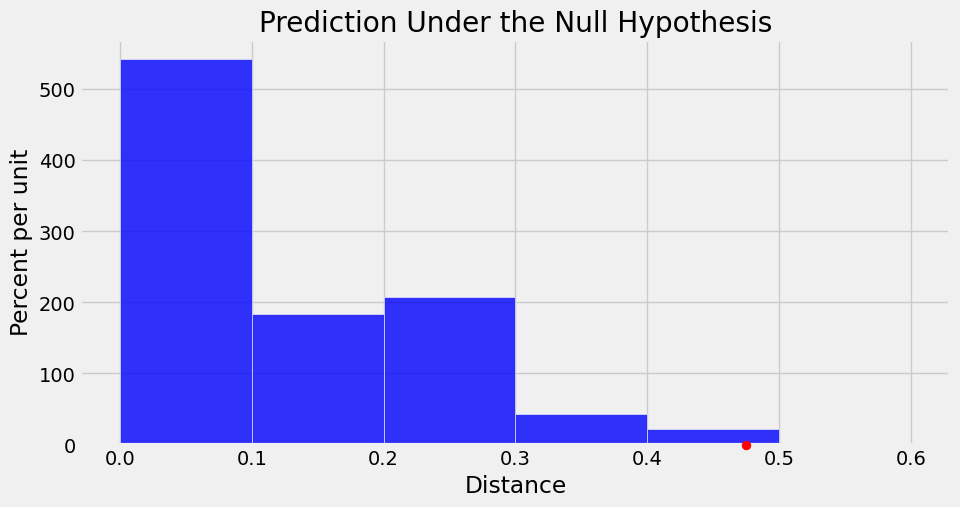

In [253]:
test_conclusion = pd.DataFrame({"Distance": distances})
print("Observed Distance", observed_distance)
print("Empirical P-value:", round(empirical_P, 4) * 100, "%")
unit = ""
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    test_conclusion,
    bins=np.arange(0, 0.7, 0.1),
    density=True,
    color="blue",
    alpha=0.8,
    ec="white",
)
ax.scatter(observed_distance, 0, color="red", s=40, zorder=10).set_clip_on(False)
y_vals = ax.get_yticks()
y_label = "Percent per " + (unit if unit else "unit")
x_label = "Distance"
ax.set_yticklabels(["{:g}".format(x * 100) for x in y_vals])
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.title("Prediction Under the Null Hypothesis")
plt.show()